Name: Kieran Fitzmaurice

# Orbit of the Earth

(Adapted from textbook exercise 8.12)

Use `scipy.integrate.odeint` to calculate the orbit of the Earth around the Sun. The equation of motion for the position $\vec{r} = (x,y)$ of the planet in its orbital plane is
$$\frac{d^2\vec{r}}{dt^2} = -GM \frac{\vec{r}}{r^3}\,,$$
where $G=6.6738\times10^{-11}$ m$^3$kg$^{-1}$s$^{-2}$ is Newton's gravitational constant and $M=1.9891\times10^{30}$ kg is the mass of the Sun.

The orbit of the Earth is not perfectly circular, the planet being sometimes closer to and sometimes further from the Sun. When it is at its closest point, or *perihelion*, it is moving precisely tangentially (i.e., perpendicular to the line between itself and the Sun) and it has distance $1.4710\times10^{11}$ m from the Sun and linear velocity $3.0287\times10^4$ m/s.

- Write a program to calculate the orbit of the Earth. Make a plot of the orbit, showing several complete revolutions about the Sun. The orbit should be very slightly, but visibly, non-circular.

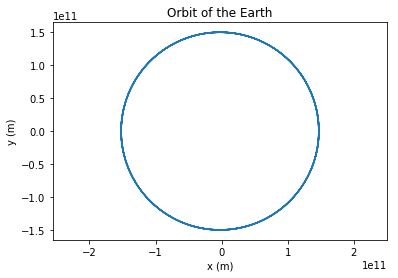

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(r,t):
    x,y,vx,vy = r
    R = np.sqrt(x**2 + y**2)
    fx = vx
    fy = vy
    fvx = -G*M*x/R**3
    fvy = -G*M*y/R**3
    return([fx,fy,fvx,fvy])

G = 6.6738e-11
M = 1.9891e30

#Initial Conditions
x = 1.471e11
y = 0
vx = 0
vy = 3.0287e4

t = np.linspace(0,4*365*24*60*60,4*10000)

r = odeint(f,(x,y,vx,vy),t)
x,y,vx,vy = r.T
plt.plot(x,y)
plt.axis("equal")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Orbit of the Earth")
plt.show()

- The gravitational potential energy of the Earth is $-GMm/r$, where $m=5.9722\times10^{24}$ kg is the mass of the planet, and its kinetic energy is $\tfrac12 mv^2$ as usual. Calculate both of these quantities, along with their sum (which is the total energy), and make a plot showing all three as a function of time on the same axes. You should find that the potential and kinetic energies vary visibly during the course of an orbit, but the total energy remains constant. As a reference, draw vertical lines on your energy plot at each complete period.

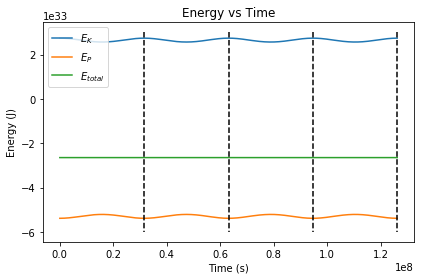

In [2]:
m = 5.9722e24
PE = -G*M*m/np.sqrt(x**2 + y**2)
KE = 0.5*m*(vx**2 + vy**2)

year = 365*24*60*60


periods = [1*year,2*year,3*year,4*year]

plt.plot(t,KE,label = "$E_K$")
plt.plot(t,PE,label = "$E_P$")
plt.plot(t,KE + PE,label = "$E_{total}$")

for p in periods:
    plt.plot([p,p],[3e33,-6e33],'k--')
    
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.title("Energy vs Time")
plt.legend()
plt.tight_layout()
plt.show()

# Space Garbage

(Adapted from textbook exercise 8.8)

A heavy steel rod and a spherical ball-bearing, discarded by a passing spaceship, are floating in zero gravity and the ball bearing is orbiting around the rod under the effect of its gravitational pull:

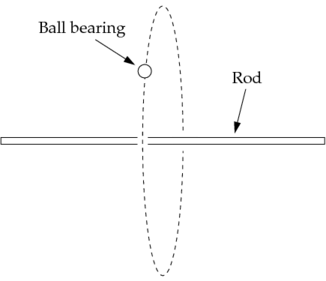

For simplicity we'll assume that the rod is of negligible cross-section and heavy enough that it doesn't move significantly, and that the ball bearing is orbiting around the rod's mid-point in a plane perpendicular to the rod. The equations of motion for the position $x,y$ of the ball bearing in the $xy$-plane are thus
$$\frac{d^2 x}{dt^2} = - GM \frac{x}{r^2\sqrt{r^2+L^2/4}},\qquad \frac{d^2 y}{dt^2} = - GM \frac{y}{r^2\sqrt{r^2+L^2/4}}\,,$$
where $r=\sqrt{x^2+y^2}$.

Convert these two second-order equations into four first-order ones. Then, working in units where $G=1$, write a program to solve them for $M=10$, $L=2$, and initial conditions $(x,y)=(1,0)$ with velocity of $+1$ in the $y$-direction. Calculate the orbit from $t=0$ to $t=10$ and make a plot of it. You should find that the ball bearing does not orbit in a circle or ellipse as a planet does, but has a precessing orbit, which arises because the attractive force is not a simple $1/r^2$ force as it is for a planet orbiting the Sun.

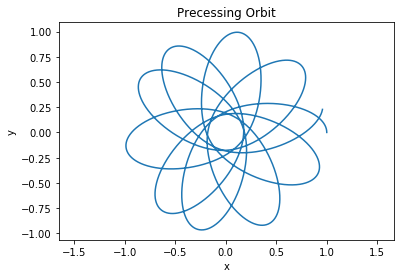

In [3]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(r,t):
    x,y,vx,vy = r
    R = np.sqrt(x**2 + y**2)
    fx = vx
    fy = vy
    fvx = -G*M*x/(R**2*np.sqrt(R**2 + L**2/4))
    fvy = -G*M*y/(R**2*np.sqrt(R**2 + L**2/4))
    return(np.array([fx,fy,fvx,fvy]))

#Initial Conditions
G = 1
M = 10
L = 2

x = 1
y = 0
vx = 0 
vy = 1

t = np.linspace(0,10,5000)

r = odeint(f,(x,y,vx,vy),t)
x,y,vx,vy = r.T

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Precessing Orbit")
plt.axis("equal")
plt.show()

# Oscillating Chemical Reactions

(Adapted from textbook exercise 8.18)

The [Belousov-Zhabotinsky reaction](https://www.youtube.com/watch?v=uWh8reiXq58) is a chemical oscillator, a cocktail of chemicals which, when heated, undergoes a series of reactions that cause the chemical concentrations in the mixture to oscillate between two extremes. Physicist Ilya Prigogine formulated a mathematical model of this type of chemical oscillator, which he called the "Brusselator" after his home town of Brussels. The equations for the Brusselator are
$$\frac{dx}{dt} = 1 - (b+1)x + ax^2y, \qquad \frac{dy}{dt} = bx - ax^2y\,.$$
Here $x$ and $y$ represent concentrations of chemicals and $a$ and $b$ are positive constants.

Write a program to solve these equations for the case $a=1$, $b=3$ with initial conditions $x=y=0$. Calculate a solution from $t=0$ to $t=20$. Make a plot of your solutions for $x$ and $y$ as a function of time, both
on the same graph.

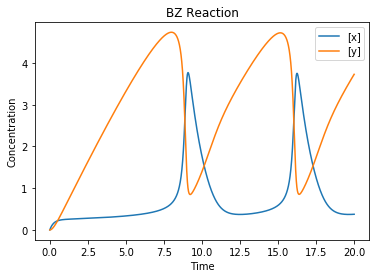

In [4]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(r,t):
    x,y = r
    fx = 1 - (b+1)*x + a*x**2*y
    fy = b*x - a*x**2*y
    return(np.array([fx,fy]))
    
#Initial Conditions
a = 1
b = 3
x = 0
y = 0

t = np.linspace(0,20,5000)

r = odeint(f,(x,y),t)
x,y = r.T

plt.plot(t,x,label = "[x]")
plt.plot(t,y,label = "[y]")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("BZ Reaction")
plt.legend()
plt.show()

# Quantum Oscillators

(Adapted from textbook exercise 8.14)

Consider the one-dimensional, time-independent Schr&ouml;dinger equation in a harmonic (i.e., quadratic)
potential $V(x)=V_0 x^2/a^2$, where $V_0$ and $a$ are constants.

- Write down the Schr&ouml;dinger equation for this problem
$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2} + V(x)\,\psi(x)=E\,\psi(x)\,,$$
and convert it from a second-order equation to two first-order ones.


- Write a program to find the energies of the ground state and the first two excited states for these equations when $m$ is the electron mass, $V_0=50$ eV, and $a=10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x=\pm\infty$, but you can get good answers by using a large but finite interval. Try using $x=-10a$ to $+10a$, with the wavefunction $\psi=0$ at both boundaries. The wavefunction is real everywhere, so you don't need to use complex variables.


- The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers.
> Hint: The ground state has energy in the range 100 to $200$ eV.

/Users/kieranfitzmaurice/anaconda/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


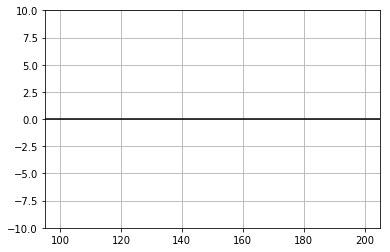

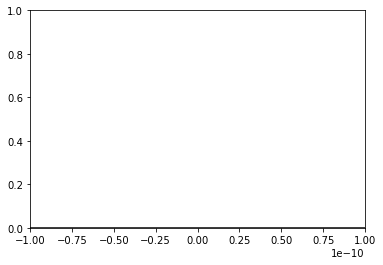

In [2]:
# I was able to get a similar problem from the in class excercises to work,
# but kept getting errors with this homework problem. The code I've included
# should give an idea of the approach I tried to take.

%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import simps
from scipy.optimize import newton, fmin

def V(x):
    return(V0*x**2/a**2)

@np.vectorize
def func(E):
    def f(r, x):
        psi, dpsi = r
        f1 = dpsi
        f2 = (-2*m/h_bar**2)*(E - V(x))*psi
        return f1, f2
    r = odeint(f, (psi0, dpsi0), (-10*a,10*a))
    psi, dpsi = r.T
    return psi[-1] 

c = 3.00e8
psi0 = 0
dpsi0 = 1
V0 = 50
a = 1e-11
h_bar = 6.582119514e-16
m = 0.511e6


E = np.linspace(100,200,1000)

plt.plot(E, func(E))
plt.grid()
plt.axhline(color="k")
plt.axis(ymin = -10,ymax = 10)
plt.show()

energy = []

for guess in []:
    E = newton(func, guess)
    energy.append(E)
    print("E =", E)
    
def f(r, x, E):
    psi, dpsi = r
    f1 = dpsi
    f2 = 2*m*(V(x) - E)*psi/h_bar**2
    return f1, f2

x = np.linspace(-10*a, 10*a, 1000)

for E in energy[:3]: 
    r = odeint(f, (psi0, dpsi0), x, args=(E,))
    psi, dpsi = r.T
    scale = np.sqrt(simps(psi**2, x))
    plt.plot(x, psi/scale)
plt.axhline(color="k")
plt.axis(xmin=-10*a, xmax=10*a)
plt.show()

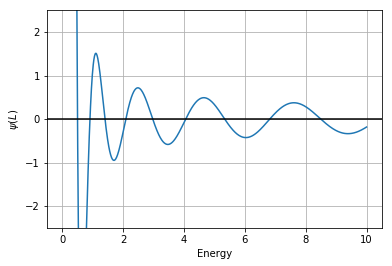

E = 0.504352003093
E = 0.912948065247
E = 1.4069531089
E = 2.09104195258
E = 2.97533600895
E = 4.05867770198
E = 5.34028278062
E = 6.81976816213
E = 8.49693757816


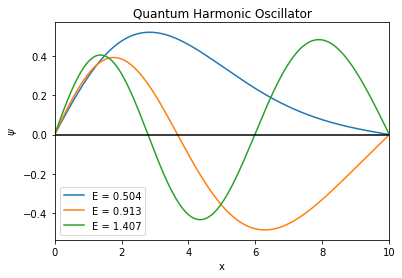

In [6]:
# Here is a similar problem I worked from the in class excercises, 
# which I used the same approach for.


%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import simps
from scipy.optimize import newton, fmin

def V(x):
    return(x/L)

@np.vectorize
def func(E):
    def f(r, x):
        psi, dpsi = r
        f1 = dpsi
        f2 = (V(x) - E)*psi
        return f1, f2
    r = odeint(f, (psi0, dpsi0), (0,L))
    psi, dpsi = r.T
    return psi[-1] 

L = 10
psi0 = 0
dpsi0 = 1

E = np.linspace(0,10,1000)

plt.plot(E, func(E))
plt.axis(ymin = -2.5,ymax = 2.5)
plt.grid()
plt.axhline(color="k")
plt.xlabel("Energy")
plt.ylabel("$\psi (L)$")
plt.show()

energy = []

for guess in [0.5,0.9,1.4,2.1,3,4,5.3,6.8,8.5]:
    E = newton(func, guess)
    energy.append(E)
    print("E =", E)
    
def f(r, x, E):
    psi, dpsi = r
    f1 = dpsi
    f2 = (V(x) - E)*psi
    return f1, f2

x = np.linspace(0, L, 1000)

for E in energy[:3]: 
    r = odeint(f, (psi0, dpsi0), x, args=(E,))
    psi, dpsi = r.T
    scale = np.sqrt(simps(psi**2, x))
    plt.plot(x, psi/scale,label = "E = %.3lf" % E)
    
plt.axhline(color="k")
plt.axis(xmin=0, xmax=L)
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("Quantum Harmonic Oscillator")
plt.legend()
plt.show()